In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random
import re

In [12]:
def to_numeric(s):
    """Converts string `s` to a float.

    Invalid strings and NaN values will be converted to float('nan').
    """

    if isinstance(s, str):
        s = s.replace(",", '')
        s = pd.to_numeric(s, errors="coerce")
    return float(s)

def get_number_list(s):
    """Get a list of integers contained in string `s`
    """
    return [int(n) for n in re.findall("(\d+)", str(s))]

def get_number_list_clean(s):
    """Return a clean list of numbers contained in `s`.

    Additional cleaning includes removing numbers that are not of interest 
    and standardizing return list size.
    """
    s = s.replace("3-D", '')
    s = s.replace("14-dimensional", '')
    n_list = get_number_list(s)
    n_list += [-1]*(5-len(n_list))
    return n_list

def get_number(s):
    """Get the first number contained in string `s`.

    If `s` does not contain any numbers, return -1.
    """
    n_list = get_number_list(s)
    return n_list[0] if len(n_list) >= 1 else -1

def find_quote_at_rank(l, i):
    """Return the quote at a certain rank in list `l`.

    Quotes are indexed starting at 1 as ordered in the survey.

    If quote is not present in `l`, return -1.
    """
    return l.index(i) + 1 if i in l else -1

def cat_in_s(s, cat):
    """Return if a category is present in string `s` as an binary integer.
    """
    return int(cat in s) if not pd.isna(s) else 0



In [13]:
df = pd.read_csv('data/clean_quercus.csv')

# Data Cleaning and Formatting

In [14]:
columns = ['q_scary_-1', 'q_scary_1', 'q_scary_10', 'q_scary_2', 'q_scary_3', 'q_scary_4',
               'q_scary_5', 'q_scary_6', 'q_scary_7', 'q_scary_8', 'q_scary_9',
               'q_dream_-1', 'q_dream_1', 'q_dream_2', 'q_dream_3', 'q_dream_4', 'q_dream_5', 'q_desktop_-1',
               'q_desktop_1', 'q_desktop_2', 'q_desktop_3', 'q_desktop_4',
               'q_desktop_5', 'q_sell', 'q_temperature', 'q_better_People',
               'q_better_Cars', 'q_better_Cats', 'q_better_Fireworks',
               'q_better_Explosions', 'q_remind_Parents', 'q_remind_Siblings',
               'q_remind_Friends', 'q_remind_Teacher', 'q_quote_1', 'q_quote_2',
               'q_quote_3', 'q_quote_4', 'q_quote_5']


df["q_scary"] = df["q_scary"].apply(get_number) # only gets the number
df["q_dream"] = df["q_dream"].apply(get_number) # only gets the number
df["q_desktop"] = df["q_desktop"].apply(get_number) # only gets the number

#Creating dummy variables for 'q_scary' and delete original variable
scary_dummies = pd.get_dummies(df["q_scary"], prefix="q_scary")
for i, col in enumerate(pd.get_dummies(scary_dummies.columns)):
  df.insert(1 + i, col, scary_dummies[col])
del df['q_scary']

#Creating dummy variables for 'q_dream' and delete original variable
dream_dummies = pd.get_dummies(df["q_dream"], prefix="q_dream")
for i, col in enumerate(pd.get_dummies(dream_dummies.columns)):
  df.insert(10 + i, col, dream_dummies[col])
del df['q_dream']

#Creating dummy variables for 'q_desktop' and delete original variable
desktop_dummies = pd.get_dummies(df["q_desktop"], prefix="q_desktop")
for i, col in enumerate(pd.get_dummies(desktop_dummies.columns)):
  df.insert(15 + i, col, desktop_dummies[col])
del df['q_desktop']

df.columns

Index(['q_scary_-1', 'q_scary_1', 'q_scary_10', 'q_scary_2', 'q_scary_3',
       'q_scary_4', 'q_scary_5', 'q_scary_6', 'q_scary_7', 'q_scary_8',
       'q_dream_-1', 'q_dream_1', 'q_dream_2', 'q_dream_3', 'q_dream_4',
       'q_desktop_-1', 'q_desktop_1', 'q_desktop_2', 'q_desktop_3',
       'q_desktop_4', 'q_desktop_5', 'q_dream_5', 'q_scary_9', 'q_better',
       'q_remind', 'q_quote', 'q_sell', 'q_temperature', 'q_story', 'user_id',
       'label'],
      dtype='object')

In [15]:
# Create multi-category indicators for 'q_better'

for cat in ["People", "Cars", "Cats", "Fireworks", "Explosions"]:
    df[f"q_better_{cat}"] = df["q_better"].apply(lambda s: cat_in_s(s, cat))

del df["q_better"]

In [16]:
# Create multi-category indicators for 'q_remind'

for cat in ["Parents", "Siblings", "Friends", "Teacher"]:
    df[f"q_remind_{cat}"] = df["q_remind"].apply(lambda s: cat_in_s(s, cat))

del df["q_remind"]

In [17]:
# Create multi-category indicators for 'q_quote'
df.index = range(0, len(df))
df['q_quote_1'] = np.zeros(len(df))
df['q_quote_2'] = np.zeros(len(df))
df['q_quote_3'] = np.zeros(len(df))
df['q_quote_4'] = np.zeros(len(df))
df['q_quote_5'] = np.zeros(len(df))

for i in range(len(df)):
  df['q_quote'].loc[i] = get_number_list_clean(df['q_quote'].loc[i])
  for j, num in enumerate(df['q_quote'].loc[i]):
    df[f'q_quote_{j+1}'].loc[i] = num

del df['q_quote']

c:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
# Change variables to numeric and normalize the temperature and sell features

df['label'] = pd.to_numeric(df['label'])
df['q_temperature'] = df["q_temperature"].apply(to_numeric)
df["q_sell"] = df["q_sell"].apply(to_numeric) # changes nulls to 0

In [19]:
df['q_temperature'] = (df["q_temperature"] - np.mean(df["q_temperature"])) / np.std(df["q_temperature"])
df['q_sell'] = (df["q_sell"] - np.mean(df["q_sell"])) / np.std(df["q_sell"])

In [20]:
#Seperate the targets and features
X = df.drop(['label', 'q_story', 'user_id'], axis=1).fillna(0)
t = pd.get_dummies(df['label'], prefix='Label')

In [21]:
from sklearn.model_selection import train_test_split

#Split the training data into training and validation datasets
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 20)
X_valid, X_test, t_valid, t_test = train_test_split(X_test, t_test, test_size = 0.5, random_state = 20)

In [22]:
X_train = X_train.to_numpy()
t_train = t_train.to_numpy()
X_valid = X_valid.to_numpy()
t_valid = t_valid.to_numpy()
X_test = X_test.to_numpy()
t_test = t_test.to_numpy()

# Data Exporation

In [23]:
# for fet in df.columns:
#     if fet != "label":
#       plt.figure()
#       X = df[fet]
#       t = df["label"]
#       plt.title("Relationship between " + fet + " and Label")
#       plt.scatter(t, X)
#       plt.xlabel('Label')
#       plt.ylabel(fet)


In [24]:
# for fet in df.columns:
#   if fet != "label":
#     fig, axs = plt.subplots(1, 3, tight_layout=True)
#     fig.suptitle("Distribution of " + fet + " given the Label")
#     X_label_1 = df[fet][df['label'] == 1]
#     X_label_2 = df[fet][df['label'] == 2]
#     X_label_3 = df[fet][df['label'] == 3]
#     axs[0].hist(X_label_1)
#     axs[0].set(xlabel='Label 1')

#     axs[1].hist(X_label_2)
#     axs[1].set(xlabel='Label 2')

#     axs[2].hist(X_label_3)
#     axs[2].set(xlabel='Label 3')


# Creating MLP prediction model

In [25]:
def softmax(z):
    z = np.transpose(z)
    m = z.max(axis=0)
    exponent = np.exp(z - m)
    return np.transpose(exponent / np.sum(exponent, axis=0))

In [26]:
class MLPModel(object):

  def __init__(self, num_features=39, num_hidden=10, num_classes=3):
    self.num_features = num_features
    self.num_hidden = num_hidden
    self.num_classes = num_classes
    self.weights1 = np.zeros([num_features, num_hidden])
    self.bias1 = np.zeros([num_hidden])
    self.weights2 = np.zeros([num_hidden, num_classes])
    self.bias2 = np.zeros([num_classes])
    self.cleanup()
    self.initializeParams()

  def initializeParams(self):
    self.weights1 = np.random.normal(0, 2/self.num_features, self.weights1.shape)
    self.bias1 = np.random.normal(0, 2/self.num_features, self.bias1.shape)
    self.weights2 = np.random.normal(0, 2/self.num_hidden, self.weights2.shape)
    self.bias2 = np.random.normal(0, 2/self.num_hidden, self.bias2.shape)

  def forward(self, X):
    self.N = X.shape[0]
    self.X = X
    
    self.z1 = np.dot(X, self.weights1) + self.bias1
    self.h = np.maximum(np.zeros_like(self.z1), self.z1)
    self.z2 = np.dot(self.h, self.weights2) + self.bias2
    self.y = softmax(self.z2)

    return self.y

  def backward(self, ts):
    self.z2_bar = (self.y - ts)/self.N
    self.w2_bar = np.dot(self.h.T, self.z2_bar)
    self.b2_bar = self.z2_bar[0]
    self.h_bar = np.dot(self.z2_bar, self.weights2.T)
    self.z1_bar = self.h_bar * (self.z1 * (self.z1 > 0)*1)
    self.w1_bar = np.dot(self.X.T, self.z1_bar)
    self.b1_bar = self.z1_bar[0]


  def loss(self, ts):
    m = ts.shape[1]

    return -(1/m)*np.sum(ts * np.log(self.y))


  def update(self, alpha):
    self.weights1 = self.weights1 - alpha * self.w1_bar
    self.bias1 = self.bias1 - alpha * self.b1_bar
    self.weights2 = self.weights2 - alpha * self.w2_bar
    self.bias2 = self.bias2 - alpha * self.b2_bar

  def cleanup(self):
    self.N = None
    self.X = None
    self.z1 = None
    self.h = None
    self.z2 = None
    self.y = None
    self.z2_bar = None
    self.w2_bar = None
    self.b2_bar = None
    self.h_bar = None
    self.z1_bar = None
    self.w1_bar = None
    self.b1_bar = None

In [27]:
def train_sgd(model, X_train, t_train,
              alpha=0.1, n_epochs=0, batch_size=100,
              X_valid=None, t_valid=None,
              w_init=None, plot=True):
    # as before, initialize all the weights to zeros
    w = np.zeros(X_train.shape[1])
    
    train_loss = [] # for the current minibatch, tracked once per iteration
    valid_loss = [] # for the entire validation data set, tracked once per epoch

    # track the number of iterations
    niter = 0

    # we will use these indices to help shuffle X_train
    N = X_train.shape[0] # number of training data points
    indices = list(range(N))
    
    for e in range(n_epochs):
        random.shuffle(indices) # for creating new minibatches

        for i in range(0, N, batch_size):
            if (i + batch_size) > N:
                # At the very end of an epoch, if there are not enough
                # data points to form an entire batch, then skip this batch
                continue

            indices_in_batch = indices[i: i+batch_size]
            X_minibatch = X_train[indices_in_batch, :]
            # X_minibatch = itemgetter(indices_in_batch)(X_train)
            t_minibatch = t_train[indices_in_batch]

            # gradient descent iteration
            model.cleanup()
            model.forward(X_minibatch)
            model.backward(t_minibatch)
            model.update(alpha)
            # Record the current training loss values
            train_loss.append(model.loss(t_minibatch))
            niter += 1

        # compute validation data metrics, if provided, once per epoch
        if (X_valid is not None) and (t_valid is not None):
            model.cleanup()
            model.forward(X_valid)
            valid_loss.append((niter, model.loss(t_valid)))

    if plot:
        plt.title("SGD Training Curve Showing Loss at each Iteration")
        plt.plot(train_loss, label="Training Loss")
        if (X_valid is not None) and (t_valid is not None): # compute validation data metrics, if provided
            plt.plot([iter for (iter, loss) in valid_loss], 
                     [loss for (iter, loss) in valid_loss],                                
                     label="Validation Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
        print("Final Training Loss:", train_loss[-1])
        if (X_valid is not None) and (t_valid is not None):
            print("Final Validation Loss:", valid_loss[-1])
    return train_loss[-1], valid_loss[-1]

In [28]:
train_score = {}
valid_score = {}
for i in range(1, 25):
	for j in range(1, 25):
		model = MLPModel(num_hidden=i)
		train_score[i, j], valid_score[i,j] = train_sgd(model, X_train=X_train, t_train=t_train, X_valid=X_valid, t_valid=t_valid, alpha=0.01*j, batch_size=50, n_epochs=100, plot=False)

In [29]:
for k in valid_score:
    if valid_score[k] == min(valid_score.values()):
        print(k)

(15, 2)


In [30]:
for k in train_score:
    if train_score[k] == min(train_score.values()):
        print(k)

(19, 14)


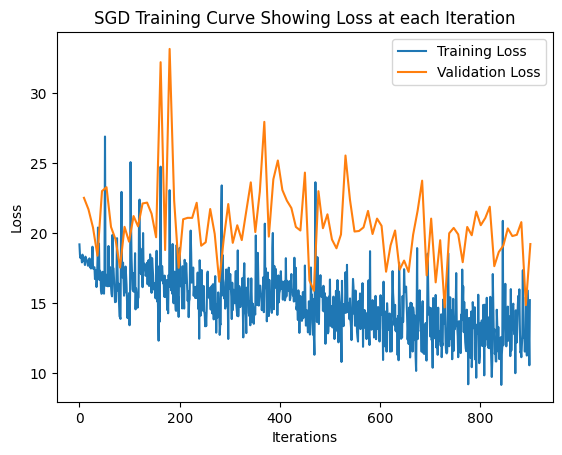

Final Training Loss: 15.208039995985482
Final Validation Loss: (900, 19.212696459116582)


(15.208039995985482, (900, 19.212696459116582))

In [35]:
i,j = k
model = MLPModel(num_hidden=i)
train_sgd(model, X_train=X_train, t_train=t_train, X_valid=X_valid, t_valid=t_valid, alpha=0.01*j, batch_size=50, n_epochs=100, plot=True)

In [40]:
model.cleanup()
test_predictions = np.argmax(model.forward(X_test), axis=1)

test_labels = np.argmax(t_test, axis=1)

test_accuracy = sum(test_labels == test_predictions) / X_test.shape[0]
test_accuracy

0.65

In [43]:
import pickle

file_name = 'model.pkl'

f = open(file_name, 'wb')

pickle.dump(model, f)

f.close()